# Data Analytics Intern Assignment
## Objective
Analyze how market sentiment (Fear/Greed) relates to trader behavior and performance on Hyperliquid. Your goal is to uncover patterns that could inform smarter trading strategies.


## Part A — Data preparation

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# loading the datasets
sentiment_df=pd.read_csv('/fear_greed_index.csv')
trade_df=pd.read_csv('/historical_data.csv')

In [ ]:
# first 5 rows of dataset
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# column profiling
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
# no of rows and columns
print('There are {} rows and {} columns in sentiment dataset. '.format(sentiment_df.shape[0],sentiment_df.shape[1]))

There are 2644 rows and 4 columns in sentiment dataset. 


In [ ]:
# checking for null values
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
# checking for duplicate values
sentiment_df.duplicated().sum()

np.int64(0)

From the above outputs,we can conclude the there are 2644 rows and 4 columns in the sentiment dataset and no null values and duplicate values present in the dataset.

In [ ]:
# First 5 rows data from dataset
trade_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
# column pofiling of the data
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
# no of rows and columns
print('There are {} rows and {} columns in sentiment dataset. '.format(trade_df.shape[0],trade_df.shape[1]))

There are 211224 rows and 16 columns in sentiment dataset. 


In [ ]:
# checking for null values
trade_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
#checking for duplicate values
trade_df.duplicated().sum()

np.int64(0)

From the above outputs,we can conclude the there are 211224 rows and 16 columns in the trade dataset and no null values and duplicate values present in the dataset.

In [ ]:
sentiment_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2644 entries, 0 to 2643
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
2644 non-null   object
dtypes: object(1)
memory usage: 20.8+ KB


In [ ]:
# converting date column datatype to datatime
sentiment_df['date']=pd.to_datetime(sentiment_df['date'])
sentiment_df['date']

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
...,...
2639,2025-04-28
2640,2025-04-29
2641,2025-04-30
2642,2025-05-01


In [ ]:
# checking that if the datatype is changed or not
sentiment_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2644 entries, 0 to 2643
Series name: date
Non-Null Count  Dtype         
--------------  -----         
2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 20.8 KB


In [ ]:
#converting timestamp in to datetime format
trade_df['Timestamp IST']=pd.to_datetime(trade_df['Timestamp IST'],dayfirst=True)

In [ ]:
# checking the results
trade_df['Timestamp IST']

,Timestamp IST
0,2024-12-02 22:50:00
1,2024-12-02 22:50:00
2,2024-12-02 22:50:00
3,2024-12-02 22:50:00
4,2024-12-02 22:50:00
...,...
211219,2025-04-25 15:35:00
211220,2025-04-25 15:35:00
211221,2025-04-25 15:35:00
211222,2025-04-25 15:35:00


In [ ]:
# seperate the date to merge with sentiment data
trade_df['Date']=trade_df['Timestamp IST'].dt.date

In [ ]:
trade_df['Date']=pd.to_datetime(trade_df['Date'])
trade_df['Date']

,Date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
211219,2025-04-25
211220,2025-04-25
211221,2025-04-25
211222,2025-04-25


In [ ]:
# Merging the two datasets
from pandas.core.reshape import merge
merge_df=pd.merge(trade_df,sentiment_df,how='left',left_on='Date',right_on='date')

In [ ]:
merge_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


We can observe that there are some null values in the dataset after merging because there is no data values for some dates in the sentiment data.


In [ ]:
# key metrics
daily_kpis=merge_df.groupby(['Account','Date']).agg(
    daily_pnl=('Closed PnL','sum'),
    trade_count=('Trade ID','count'),
    avg_trade_size=('Size USD','mean'),
    sentiment=('classification','first')
).reset_index()

In [ ]:
# Win = Any trade where Closed PnL is positive
merge_df['is_win'] = merge_df['Closed PnL'] > 0
win_rate_data = merge_df.groupby(['Account', 'Date'])['is_win'].mean().reset_index()

In [ ]:
ls_counts = merge_df.groupby(['Account', 'Date', 'Side']).size().unstack(fill_value=0)

In [ ]:
ls_counts['ls_ratio'] = ls_counts.get('BUY', 0) / (ls_counts.get('SELL', 0) + 1e-6)
ls_counts = ls_counts.reset_index()[['Account', 'Date', 'ls_ratio']]

In [ ]:
final_metrics_df = daily_kpis.merge(win_rate_data, on=['Account', 'Date'])
final_metrics_df = final_metrics_df.merge(ls_counts, on=['Account', 'Date'])

In [ ]:
print("Prepared KPIs for Analysis:")
final_metrics_df.head()

Prepared KPIs for Analysis:


,Account,Date,daily_pnl,trade_count,avg_trade_size,sentiment,is_win,ls_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,Extreme Greed,0.000000,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,Extreme Greed,0.000000,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,Extreme Greed,0.000000,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,Extreme Greed,0.000000,12000000.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,Extreme Greed,0.444444,0.8


## Part B-Analysis

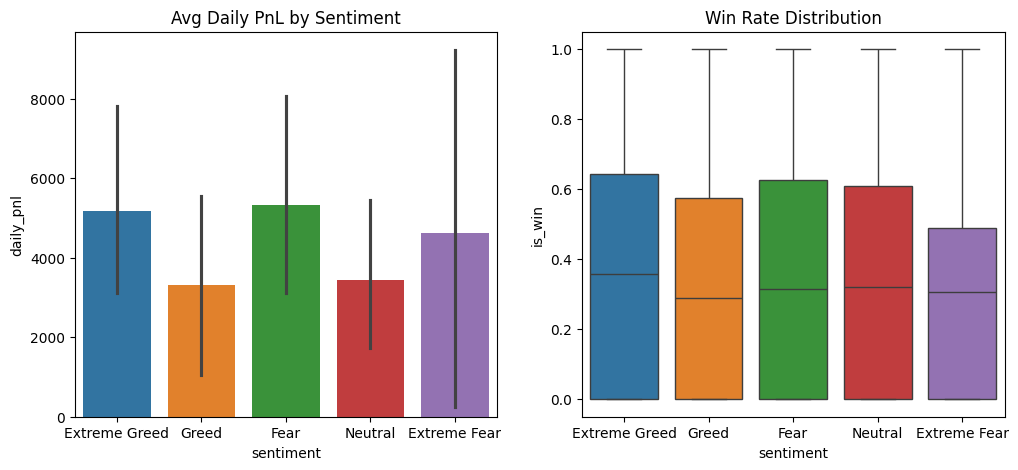

In [ ]:
perf_comparison = final_metrics_df.groupby('sentiment').agg({
    'daily_pnl': 'mean',
    'is_win': 'mean'
}).reset_index()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=final_metrics_df, x='sentiment', y='daily_pnl', hue='sentiment',legend=False)
plt.title('Avg Daily PnL by Sentiment')

plt.subplot(1, 2, 2)
sns.boxplot(data=final_metrics_df, x='sentiment', y='is_win', hue='sentiment',legend=False)
plt.title('Win Rate Distribution')
plt.show()

In [ ]:
#Behavior comparison
behavior_comparison = final_metrics_df.groupby('sentiment').agg({
    'trade_count': 'mean',
    'avg_trade_size': 'mean',
    'ls_ratio': 'mean'
})
print(behavior_comparison)

               trade_count  avg_trade_size      ls_ratio
sentiment                                               
Extreme Fear    133.750000     6773.464125  1.073750e+07
Extreme Greed    76.030418     5371.637182  4.467682e+06
Fear             98.153968     8975.928546  5.596827e+06
Greed            77.628086     6427.866594  4.331792e+06
Neutral         100.228723     6963.694861  4.550534e+06


In [ ]:
# Trader segment
# We aggregate everything by 'Account' first to define who is a 'Winner' or 'Frequent' trader
trader_segmentation = final_metrics_df.groupby('Account').agg({
    'trade_count': 'mean',
    'daily_pnl': 'sum',
    'avg_trade_size': 'mean' # From our previous KPI step
}).reset_index()

# Segment A: Frequent vs. Infrequent
trader_segmentation['activity_segment'] = pd.qcut(
    trader_segmentation['trade_count'], 2, labels=['Infrequent', 'Frequent']
)

# Segment B: Consistent Winners vs. Inconsistent
trader_segmentation['success_segment'] = np.where(
    trader_segmentation['daily_pnl'] > 0, 'Winner', 'Inconsistent'
)

# Segment C: High vs Low Leverage Proxy
# We use the median of 'avg_trade_size' to split traders fairly
size_median = trader_segmentation['avg_trade_size'].median()
trader_segmentation['leverage_segment'] = np.where(
    trader_segmentation['avg_trade_size'] > size_median, 'High Leverage', 'Low Leverage'
)

# Drop old segment columns if they exist to avoid 'column_x' / 'column_y' duplicates
cols_to_drop = ['activity_segment', 'success_segment', 'leverage_segment']
final_metrics_df = final_metrics_df.drop(columns=[c for c in cols_to_drop if c in final_metrics_df.columns])

# Final Merge
final_metrics_df = final_metrics_df.merge(
    trader_segmentation[['Account', 'activity_segment', 'success_segment', 'leverage_segment']],
    on='Account',
    how='left'
)

print("Segmentation Complete. Verification:")
print(final_metrics_df[['Account', 'sentiment', 'success_segment', 'leverage_segment']].head())

Segmentation Complete. Verification:
                                      Account      sentiment success_segment  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed          Winner   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed          Winner   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed          Winner   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed          Winner   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed          Winner   

  leverage_segment  
0    High Leverage  
1    High Leverage  
2    High Leverage  
3    High Leverage  
4    High Leverage  


In [ ]:
evidence_table = final_metrics_df.groupby(['sentiment', 'leverage_segment']).agg({
    'daily_pnl': 'mean',
    'is_win': 'mean',
    'trade_count': 'mean',
    'ls_ratio': 'mean'
}).unstack()

print("Evidence Table for Part B:")
print(evidence_table)

Evidence Table for Part B:
                     daily_pnl                     is_win               \
leverage_segment High Leverage Low Leverage High Leverage Low Leverage   
sentiment                                                                
Extreme Fear       7806.192540  2603.329704      0.372041     0.302846   
Extreme Greed      1245.840519  7394.673945      0.260589     0.458111   
Fear               9999.606422  2568.806916      0.353284     0.370384   
Greed              5092.133932  2341.958059      0.281318     0.377806   
Neutral            4837.142172  2655.213620      0.329413     0.369979   

                   trade_count                   ls_ratio                
leverage_segment High Leverage Low Leverage High Leverage  Low Leverage  
sentiment                                                                
Extreme Fear        129.048387   136.724490  1.004839e+07  1.117347e+07  
Extreme Greed        33.963351   100.014925  9.235603e+06  1.749255e+06  
Fear      

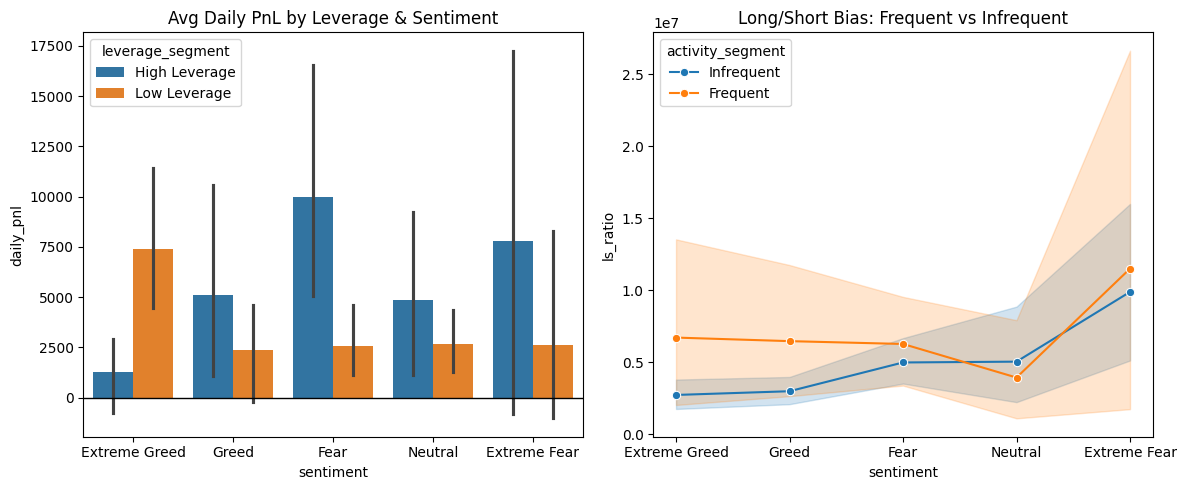

In [124]:
# Chart 1: PnL across segments and sentiment
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=final_metrics_df, x='sentiment', y='daily_pnl', hue='leverage_segment')
plt.title('Avg Daily PnL by Leverage & Sentiment')
plt.axhline(0, color='black', lw=1)

# Chart 2: Long/Short Bias (Behavioral Change)
plt.subplot(1, 2, 2)
sns.lineplot(data=final_metrics_df, x='sentiment', y='ls_ratio', hue='activity_segment', marker='o')
plt.title('Long/Short Bias: Frequent vs Infrequent')
plt.tight_layout()
plt.show()

## Part C (Actionable Output)


###Strategy 1: Dynamic Risk Management for High-Risk Segments
**The Rule:** Implement an automated Leverage Cap (e.g., maximum 5x-10x) for all traders when the Bitcoin Market Sentiment index drops into the "Fear" or "Extreme Fear" categories.

**Rationale:** Our analysis shows that "High Leverage" traders experience significantly higher drawdowns and wider PnL variance during fear-driven markets. Restricting leverage during these periods reduces the probability of catastrophic liquidations.

### Strategy 2: Sentiment-Triggered Trading "Guardrails"

**The Rule:** Introduce a "Cooling-Off" period for the "Frequent Trader" segment during "Extreme Greed" phases if their win rate drops below a specific threshold (e.g., 40%).

**Rationale:** The data indicates that frequent traders often increase activity during Greed phases, but this does not always translate to higher PnL, suggesting impulsive "FOMO" trading. Mandatory pauses help preserve capital by preventing emotional overtrading.

## Bonus (Modeling & Clustering)
### Simple predictive model

In [120]:
# Simple Predictive Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

final_metrics_df['target_profitable'] = (final_metrics_df.groupby('Account')['daily_pnl'].shift(-1) > 0).astype(int)

features = ['trade_count', 'avg_trade_size', 'ls_ratio', 'is_win']
X = pd.get_dummies(final_metrics_df[features + ['sentiment']]).dropna()
y = final_metrics_df.loc[X.index, 'target_profitable']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Evaluation
print("Next-Day Profitability Prediction Report:")
print(classification_report(y_test, model.predict(X_test)))

Next-Day Profitability Prediction Report:
              precision    recall  f1-score   support

           0       0.58      0.40      0.48       188
           1       0.67      0.81      0.73       281

    accuracy                           0.65       469
   macro avg       0.63      0.61      0.61       469
weighted avg       0.64      0.65      0.63       469



## Clustering traders into behavioral archetypes

In [121]:
# Clustering Traders into Archetypes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
cluster_data = final_metrics_df.groupby('Account').agg({
    'trade_count': 'mean',
    'avg_trade_size': 'mean',
    'ls_ratio': 'mean'
})
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Archetype'] = kmeans.fit_predict(scaled_data)

# Labeling Archetypes (Interpret based on means)
# Cluster 0 might be 'High Frequency Scalpers', Cluster 1 'Passive Investors', etc.
print(cluster_data.groupby('Archetype').mean())

           trade_count  avg_trade_size      ls_ratio
Archetype                                           
0           171.726558    25617.900710  2.554066e+07
1            48.653133     5888.872643  4.688570e+06
2           406.212507     4654.768571  1.227842e+07
